In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
#Kuvitteellinen asiakasdata
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
#Etsitään asiakasklusterit asiakkaan vuositulojen sekä ostokäyttäytymistä kuvaavan pisteytyksen perusteella
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

# 1: Klustereiden määrä - The elbow method

In [9]:
from sklearn.cluster import KMeans

In [14]:
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

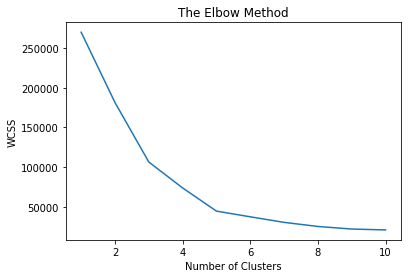

In [17]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimaalinen klustereiden määrä -- > 5

# 2: Kmeans ja esimerkkidata (kluistereiden määrällä viisi)

In [20]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

In [52]:
#Määritetyt 5 klusteria
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [47]:
#Klustereiden keskipisteet
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

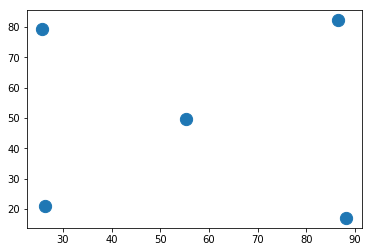

In [54]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 150 )

Text(0,0.5,'Spending score')

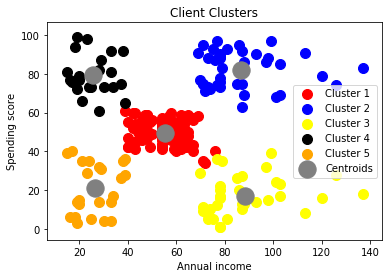

In [48]:
#Graafi
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c='yellow', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c='black', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c='orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c = 'grey', label = 'Centroids')
plt.legend()
plt.title('Client Clusters')
plt.xlabel('Annual income')
plt.ylabel('Spending score')